# Twitter Sentiment Analysis - CW1

In [2]:
import re
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import contractions
from tweepy import OAuthHandler
from textblob import TextBlob

In [3]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.coherencemodel import CoherenceModel

In [4]:
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis

**The following steps are conducted in the beginning of the CW to aquire tweets, preprocess them & save them in a csv file:**
* Connecting to Twitter API 
* Tweets Collection 
* Tweets Preprocessing 
* Save final version of tweets.csv steps 

The code is commented out as to show our implementation & not to aquire new tweets and mess up with the saved work

## <span style='background:orange'> Connecting to Twitter API </span>

First we specify our credentials

In [5]:
# # keys and tokens from the Twitter Dev Console
# consumer_key = '******'
# consumer_secret = '*******'
# access_token = '*******'
# access_token_secret = '*******'

In [6]:
# create OAuthHandler object
auth = OAuthHandler(consumer_key, consumer_secret)
# set access token and secret
auth.set_access_token(access_token, access_token_secret)
# create tweepy API object to fetch tweets
api = tweepy.API(auth)

## <span style='background:orange'> Tweets Collection </span>

In [7]:
query = "Expo2020 -filter:retweets since:2021-10-01"
count = 3000

In [8]:
def get_tweets(query, count):
    
    tweets = []
    
    # call twitter api to fetch tweets
    for tweet in tweepy.Cursor(api.search_tweets, query, lang="en", tweet_mode='extended').items(count):
        tweets.append(tweet.full_text)

        
    return tweets

In [9]:
tweets = get_tweets(query, count)
tweets_df = pd.DataFrame(tweets, columns = ["Tweet"])

In [10]:
# tweets_df[-10:]

## <span style='background:orange'> Tweets Preprocessing </span>

In [11]:
def clean_tweets(tweets):
    
    cleaned_tweets = []
    for tweet in tweets:
    
        cleaned_tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
        cleaned_tweets.append(cleaned_tweet)
    #Create a DataFrame & remove duplicate tweets
    cleaned_tweets_df = pd.DataFrame(cleaned_tweets, columns = ["Tweet"]).drop_duplicates()
    
    #Get the new list of tweets
    cleaned_tweets = cleaned_tweets_df["Tweet"].values.tolist()
    
    return cleaned_tweets_df, cleaned_tweets

In [12]:
cleaned_tweets_df, cleaned_tweets = clean_tweets(tweets)

In [13]:
# cleaned_tweets_df[:10]

#### Save Tweets for the FIRST time to a tweets.csv file

In [14]:
# #for first time saving tweets
# pd.DataFrame(cleaned_tweets, columns = ["Tweet"]).to_csv("tweets.csv")

#### Code for retrieving more tweets & saving them to the tweets.csv file

In [15]:
#count = 500
#tweets = get_tweets(query, count)
#cleaned_tweets_df, cleaned_tweets = clean_tweets(tweets)

#for subsequent times of saving tweets
#pd.DataFrame(cleaned_tweets, columns = ["Tweet"]).to_csv("tweets.csv", mode="a", header=False)

## <span style='background:orange'> Save final version of tweets.csv</span>

In [16]:
cleaned_tweets_df = pd.read_csv("tweets.csv", index_col = 0)
#Remove duplicate tweets
cleaned_tweets_df = cleaned_tweets_df.drop_duplicates()

In [17]:
# cleaned_tweets_df

In [18]:
# #Save Final Tweets Version
# pd.DataFrame(cleaned_tweets_df, columns = ["Tweet"]).to_csv("tweets_final.csv")

## <span style='background:orange'> Tweets Hand-labelling </span>

**After saving Tweets to CSV file, tweets hand labelling is done so that we can measure accuracy of classification later on**

**We will use two labels (positive/negative) for Logistic Regression, & three labels (positive/neutral/negative) for Naive Bayes**

In [19]:
#Read hand labelled tweets csv file
cleaned_tweets_df = pd.read_csv("tweets_final_labelled.csv", index_col = 0)

In [20]:
cleaned_tweets_df[-10:]

,Tweet,Label
2391,Dubai Ruler receives the credentials of three ...,0
2392,Expo 2020 venue from the sky Pretty much like ...,0
2393,Dubai See me co lead a sustainability and food...,0
2394,Good morning expo2020 Expo 2020 Dubai,0
2395,Thanks to New Zealand G2G for its role leading...,1
2396,Ruler of Dubai discusses expanding economic re...,0
2397,The Meeting Incredibly gorgeous and dazzling w...,1
2398,What a perfect blend of instruments patterns a...,1
2399,India Showcases Export Potential of Organic am...,1
2400,I m still waiting over for my habibis in Dubai...,1


In [21]:
#Show hand labelled sentiments
print("Hand labelled tweets sentiments distribution: \n", cleaned_tweets_df["Label"].value_counts())

Hand labelled tweets sentiments distribution: 
  1    1243
 0    1077
-1      80
Name: Label, dtype: int64


In [22]:
cleaned_tweets = cleaned_tweets_df["Tweet"].values.tolist()

In [23]:
cleaned_tweets[-4:]

['The Meeting Incredibly gorgeous and dazzling when the melodies of different cultures harmoniously intertwine into a single whole creating an incredible spiritual composition samiyusuf Expo2020',
 'What a perfect blend of instruments patterns and harmony music changes from sweetness to strength from heaven to earth ups and downs it travels us through the cultures of time TheJourney samiyusuf Expo2020',
 'India Showcases Export Potential of Organic amp Horticulture Produce at EXPO2020 Dubai Despite the pandemic India s organic exports grew 51 over 2019 20 levels Tripura India',
 'I m still waiting over for my habibis in Dubai to come over Sleepeless Wishing all my friends here a wonderful day ahead dubailife is good Visiting Expo2020 again today with my ladies betty and foodies 971 54 342 7795']

In [24]:
#Add lebels column representing each tweet sentiment, or Import it from the CSV
labels = cleaned_tweets_df["Label"]

In [25]:
labels[-10:]

2391    0
2392    0
2393    0
2394    0
2395    1
2396    0
2397    1
2398    1
2399    1
2400    1
Name: Label, dtype: int64

## <span style='background:orange'> Tweets Sentiment Analysis with TextBlob </span>

In [26]:
def textblob_tweet_sentiment(cleaned_tweet):
    
    analysis = TextBlob(cleaned_tweet)
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [27]:
textblob_sentiments = [textblob_tweet_sentiment(tweet) for tweet in cleaned_tweets]

In [28]:
len(textblob_sentiments)

2400

In [29]:
textblob_sentiments[-10:]

['positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive']

In [30]:
textblob_sentiments_numeric = []
for i in textblob_sentiments:
    if i == "positive":
        textblob_sentiments_numeric.append(1)
    elif i == "negative":
        textblob_sentiments_numeric.append(-1)
    else:
        textblob_sentiments_numeric.append(0)
textblob_sentiments_numeric[-10:]

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1]

## <span style='background:orange'> Text Analytics </span>

###  <span style='background:LightGreen'> CountVectorizer </span>

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
c_vect = CountVectorizer(stop_words="english")
bow = c_vect.fit_transform(cleaned_tweets)

In [32]:
bow_array = bow.toarray()
print("BOW array dimensions", pd.DataFrame(bow_array).shape)
bow_array[0]

BOW array dimensions (2400, 8097)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
print("Length of Vocabulary: ", len(c_vect.vocabulary_))
print("\nFeatures examples: \n", c_vect.get_feature_names()[1000:1010])

Length of Vocabulary:  8097

Features examples: 
 ['better', 'betterbyblue', 'betterment', 'betty', 'beverages', 'beyonc', 'beyonce', 'beyondthehorizon', 'beyondthestars', 'bgm']


C:\Users\MR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### <span style='background:dodgerblue'> Bi-Gram </span>

In [34]:
bigram_vect = CountVectorizer(ngram_range=(2, 2), stop_words="english")
bigram = bigram_vect.fit_transform(cleaned_tweets)

In [35]:
bigram_array = bigram.toarray()
print("Bigram array dimensions", pd.DataFrame(bigram_array).shape)
bigram_array[0]

Bigram array dimensions (2400, 22768)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
print("Length of Vocabulary: ", len(bigram_vect.vocabulary_))
print("\nFeatures examples: \n", bigram_vect.get_feature_names()[1000:1010])

Length of Vocabulary:  22768

Features examples: 
 ['africa confidence', 'africa developed', 'africa dubai', 'africa embarrassing', 'africa event', 'africa expo2020', 'africa food', 'africa frank', 'africa growing', 'africa home']


### <span style='background:magenta'> TF-IDF </span>

In [37]:
#Tweets Lowercasing & Contractions Removal

#Lowercasing
cleaned_tweets_df['Tweet']=cleaned_tweets_df['Tweet'].apply(lambda tweet: " ".join(word.lower()for word in tweet.split()))
#Contractions
cleaned_tweets_df['Tweet']=cleaned_tweets_df['Tweet'].apply(lambda tweet: " ".join(contractions.fix(word)for word in tweet.split()))

cleaned_tweets = cleaned_tweets_df["Tweet"].values.tolist()

In [38]:
cleaned_tweets_df

,Tweet,Label
0,the conservation between memory and knowledge ...,0
1,discover luxembourg wines at expo 2020 dubai o...,0
2,only 29 days left for you to pack in all of th...,0
3,significant participation by dubaipolice in th...,1
4,don t forget to share your photos or videos on...,0
...,...,...
2396,ruler of dubai discusses expanding economic re...,0
2397,the meeting incredibly gorgeous and dazzling w...,1
2398,what a perfect blend of instruments patterns a...,1
2399,india showcases export potential of organic am...,1


In [39]:
#Tokenization
from nltk.tokenize import word_tokenize

cleaned_tweets_df['Tweet']=cleaned_tweets_df['Tweet'].apply(lambda tweet: word_tokenize(tweet))

In [40]:
cleaned_tweets_df

,Tweet,Label
0,"[the, conservation, between, memory, and, know...",0
1,"[discover, luxembourg, wines, at, expo, 2020, ...",0
2,"[only, 29, days, left, for, you, to, pack, in,...",0
3,"[significant, participation, by, dubaipolice, ...",1
4,"[don, t, forget, to, share, your, photos, or, ...",0
...,...,...
2396,"[ruler, of, dubai, discusses, expanding, econo...",0
2397,"[the, meeting, incredibly, gorgeous, and, dazz...",1
2398,"[what, a, perfect, blend, of, instruments, pat...",1
2399,"[india, showcases, export, potential, of, orga...",1


In [41]:
#Stop Words Removal
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words_extended = stop_words.extend(["Tweet"]) 

cleaned_tweets_df['Tweet']=cleaned_tweets_df['Tweet'].apply(lambda tweet: [word for word in tweet if word not in stop_words])

In [42]:
cleaned_tweets_df

,Tweet,Label
0,"[conservation, memory, knowledge, challenges, ...",0
1,"[discover, luxembourg, wines, expo, 2020, duba...",0
2,"[29, days, left, pack, experiences, missed, ex...",0
3,"[significant, participation, dubaipolice, walk...",1
4,"[forget, share, photos, videos, instagram, exp...",0
...,...,...
2396,"[ruler, dubai, discusses, expanding, economic,...",0
2397,"[meeting, incredibly, gorgeous, dazzling, melo...",1
2398,"[perfect, blend, instruments, patterns, harmon...",1
2399,"[india, showcases, export, potential, organic,...",1


In [43]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

cleaned_tweets_df['Tweet']=cleaned_tweets_df['Tweet'].apply(lambda tweet: [wnl.lemmatize(word) for word in tweet])

In [44]:
cleaned_tweets_df

,Tweet,Label
0,"[conservation, memory, knowledge, challenge, s...",0
1,"[discover, luxembourg, wine, expo, 2020, dubai...",0
2,"[29, day, left, pack, experience, missed, expo...",0
3,"[significant, participation, dubaipolice, walk...",1
4,"[forget, share, photo, video, instagram, expom...",0
...,...,...
2396,"[ruler, dubai, discus, expanding, economic, re...",0
2397,"[meeting, incredibly, gorgeous, dazzling, melo...",1
2398,"[perfect, blend, instrument, pattern, harmony,...",1
2399,"[india, showcase, export, potential, organic, ...",1


In [45]:
# Rejoin words to create processed tweets
processed_tweets = []
for tweet in cleaned_tweets_df["Tweet"]:
    processed_tweets.append(" ".join(word for word in tweet))
    
tfidf_array = np.array(processed_tweets)

In [46]:
tfidf_array[:2]

array(['conservation memory knowledge challenge sustainability sara abram secretary general centro di conservazione e restauro la restauro venaria reale expo2020 beautyconnectspeople italyexpo2020',
       'discover luxembourg wine expo 2020 dubai 7th march book spot wine tasting animated sommelier antoine char amp chef kim kevin de dood luexpo2020dubai expo2020dubai expo2020 madeinluxembourg luxembourg'],
      dtype='<U251')

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_repr = tfidf_vect.fit_transform(tfidf_array)
tfidf_array = tfidf_repr.toarray()

In [48]:
print("Length of a single TF-IDF Vector: ", len(tfidf_repr.toarray()[0]))
print("Count of TF-IDF Vectors: ", len(tfidf_repr.toarray()))
print("TF-IDF array dimensions", pd.DataFrame(tfidf_array).shape)
tfidf_repr.toarray()[0]

Length of a single TF-IDF Vector:  7576
Count of TF-IDF Vectors:  2400
TF-IDF array dimensions (2400, 7576)


array([0., 0., 0., ..., 0., 0., 0.])

## <span style='background:orange'> Building Classification Model </span>

In [49]:
from sklearn.model_selection import train_test_split

###  <span style='background:tomato'> Logistic Regression </span>

In [50]:
from sklearn.linear_model import LogisticRegression
lgr_clf = LogisticRegression()

### Using <span style='background:LightGreen'> CountVectorizer </span>

**As Negative tweets have the least representation in our dataset, we will do classificatoin for Positive & Neutral tweets**

In [51]:
#Select only Positive & Neutral Tweets
mask = np.array(labels) != -1
labels_two = np.array(labels)[mask]
#BOW of Positive & Neutral tweets only
bow_array_two = bow_array[mask]

print("Length of initial Sentiments of two labels: ",len(labels_two))
print("Length of BOW of two labels: ",len(bow_array_two))

Length of initial Sentiments of two labels:  2320
Length of BOW of two labels:  2320


In [52]:
#Split the dataset into training & testing sets
# _cv refers to CountVectorizer
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(bow_array_two, labels_two, test_size=0.25, random_state=10)

In [53]:
print("X_train length: ", len(X_train_cv))
print("X_test length: ", len(X_test_cv))
print("Y_train length: ", len(Y_train_cv))
print("Y_test length: ", len(Y_test_cv))

X_train length:  1740
X_test length:  580
Y_train length:  1740
Y_test length:  580


In [54]:
#Fit the classifier
lgr_clf.fit(X_train_cv,Y_train_cv)
pred = lgr_clf.predict(X_test_cv)

In [55]:
#Evaluate the classification result
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("Accuracy Score:\n", accuracy_score(labels_two[1740:], pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels_two[1740:], pred))
print("\nPrecision Score:   ", precision_score(labels_two[1740:], pred))
print("Recall Score:   ", recall_score(labels_two[1740:], pred))
print("F1 Score:   ", f1_score(labels_two[1740:], pred))

Accuracy Score:
 0.4879310344827586

Confusion Matrix:
 [[167 177]
 [120 116]]

Precision Score:    0.39590443686006827
Recall Score:    0.4915254237288136
F1 Score:    0.43856332703213613


### Visualization & Comparison

In [56]:
x_axis = np.arange(1,3)

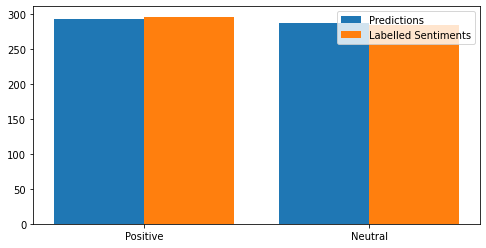

In [57]:
pred_counts = pd.Series(pred).value_counts()
labels_counts = pd.Series(Y_test_cv).value_counts()
plt.figure(figsize = (8,4))
plt.bar(x_axis -0.2, pred_counts, width=0.4, label = 'Predictions')
plt.bar(x_axis +0.2, labels_counts, width=0.4, label = 'Labelled Sentiments')
plt.xticks(x_axis,["Positive", "Neutral"])
plt.legend()

***Using Logistic Regression, The chart above shows predictions using countervectorizer and Handlabel sentiments we can indicate that the predictions were similar both in positive and neutral***

### Using <span style='background:dodgerblue'> Bi-Gram </span>

In [58]:
lgr_clf2 = LogisticRegression()

In [59]:
bigram_array_two = bigram_array[mask]

print("Length of Bigrams of two labels: ",len(bigram_array_two))

Length of Bigrams of two labels:  2320


In [60]:
# _bg refers to Bi-Gram
X_train_bg,X_test_bg,Y_train_bg, Y_test_bg = train_test_split(bigram_array_two, labels_two, test_size=0.25, random_state=10)

In [61]:
#Fit the classifier
lgr_clf2.fit(X_train_bg,Y_train_bg)
pred = lgr_clf2.predict(X_test_bg)

In [62]:
print("Accuracy Score:\n", accuracy_score(labels_two[1740:], pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels_two[1740:], pred))
print("\nPrecision Score:   ", precision_score(labels_two[1740:], pred))
print("Recall Score:   ", recall_score(labels_two[1740:], pred))
print("F1 Score:   ", f1_score(labels_two[1740:], pred))

Accuracy Score:
 0.44310344827586207

Confusion Matrix:
 [[118 226]
 [ 97 139]]

Precision Score:    0.38082191780821917
Recall Score:    0.5889830508474576
F1 Score:    0.46256239600665555


### Visualization & Comparison

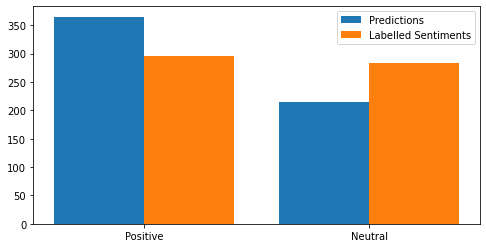

In [63]:
pred_counts = pd.Series(pred).value_counts()
labels_counts = pd.Series(Y_test_bg).value_counts()
plt.figure(figsize = (8,4))
plt.bar(x_axis -0.2, pred_counts, width=0.4, label = 'Predictions')
plt.bar(x_axis +0.2, labels_counts, width=0.4, label = 'Labelled Sentiments')
plt.xticks(x_axis,["Positive", "Neutral"])
plt.legend()

 ***Using Logistic Regression,The chart above shows predictions using Bi-Gram and Hand labelled sentiments we can indicate that the predictions differ both in positive and neutral. In the positivity of our data, Bi-Gram shows more positive predictions against our positive data which were hand labelled. Handlabelled data shows higher against the Bi-gram prediction in the Neutral***

### Using <span style='background:magenta'> TF-IDF </span>

In [64]:
lgr_clf3 = LogisticRegression()

In [65]:
tfidf_array_two = tfidf_array[mask]

print("Length of TF-IDFs of two labels: ",len(tfidf_array_two))

Length of TF-IDFs of two labels:  2320


In [66]:
X_train_tfidf,X_test_tfidf,Y_train_tfidf, Y_test_tfidf = train_test_split(tfidf_array_two, labels_two, test_size=0.25, random_state=10)

In [67]:
#Fit the classifier
lgr_clf3.fit(X_train_tfidf,Y_train_tfidf)
pred = lgr_clf3.predict(X_test_tfidf)

In [68]:
print("Accuracy Score:\n", accuracy_score(labels_two[1740:], pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels_two[1740:], pred))
print("\nPrecision Score:   ", precision_score(labels_two[1740:], pred))
print("Recall Score:   ", recall_score(labels_two[1740:], pred))
print("F1 Score:   ", f1_score(labels_two[1740:], pred))

Accuracy Score:
 0.4706896551724138

Confusion Matrix:
 [[136 208]
 [ 99 137]]

Precision Score:    0.39710144927536234
Recall Score:    0.5805084745762712
F1 Score:    0.47160068846815834


### Visualization & Comparison

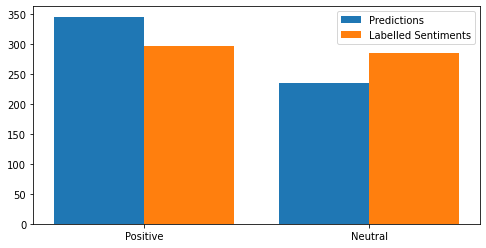

In [69]:
pred_counts = pd.Series(pred).value_counts()
labels_counts = pd.Series(Y_test_tfidf).value_counts()
plt.figure(figsize = (8,4))
plt.bar(x_axis -0.2, pred_counts, width=0.4, label = 'Predictions')
plt.bar(x_axis +0.2, labels_counts, width=0.4, label = 'Labelled Sentiments')
plt.xticks(x_axis,["Positive", "Neutral"])
plt.legend()

***Using Logistic Regression,The chart above shows predictions using TF-IDF and Hand labelled sentiments we can indicate that the predictions differ both in positive and neutral. In the positivity of our data, TF-IDF shows more positive predictions against our positive data which were hand labelled. Hand label data shows higher against then TF-IDF prediction in the Neutral***

##  <span style='background:tomato'> Naive Bayes </span>

### Using <span style='background:LightGreen'> CountVectorizer </span>

In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
nb_clf = MultinomialNB()

In [72]:
X_train_cv_nb, X_test_cv_nb, Y_train_cv_nb, Y_test_cv_nb = train_test_split(bow_array, g, test_size=0.25, random_state=10)

In [73]:
print("X_train length: ", len(X_train_cv_nb))
print("X_test length: ", len(X_test_cv_nb))
print("Y_train length: ", len(Y_train_cv_nb))
print("Y_test length: ", len(Y_test_cv_nb))

X_train length:  1800
X_test length:  600
Y_train length:  1800
Y_test length:  600


In [74]:
#Fit the classifier
nb_clf.fit(X_train_cv_nb,Y_train_cv_nb)
pred = nb_clf.predict(X_test_cv_nb)

In [75]:
print("Accuracy Score:\n", accuracy_score(labels[1800:], pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels[1800:], pred))

Accuracy Score:
 0.43166666666666664

Confusion Matrix:
 [[  0  12  15]
 [  5 134 203]
 [  3 103 125]]


### Visualization & Comparison

In [76]:
x_axis = np.arange(1,4)

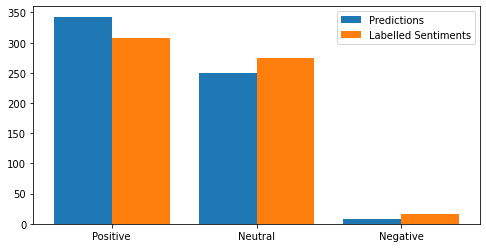

In [77]:
pred_counts = pd.Series(pred).value_counts()
labels_counts = pd.Series(Y_test_cv_nb).value_counts()
plt.figure(figsize = (8,4))
plt.bar(x_axis -0.2, pred_counts, width=0.4, label = 'Predictions')
plt.bar(x_axis +0.2, labels_counts, width=0.4, label = 'Labelled Sentiments')
plt.xticks(x_axis,["Positive", "Neutral", "Negative"])
plt.legend()

***Using Naive Bayes, The graph above shows predictions and hand label sentiments in positive,neutral and negative using CountVectorizer. the positive, neutral and negetive predictions are slightly similar to the hand labelled sentintiments.***

### Using <span style='background:dodgerblue'> Bi-Gram </span>

In [78]:
nb_clf2 = MultinomialNB()

In [79]:
X_train_bg_nb, X_test_bg_nb, Y_train_bg_nb, Y_test_bg_nb = train_test_split(bigram_array, labels, test_size=0.25, random_state=10)

In [80]:
#Fit the classifier
nb_clf2.fit(X_train_bg_nb,Y_train_bg_nb)
pred = nb_clf2.predict(X_test_bg_nb)

In [81]:
print("Accuracy Score:\n", accuracy_score(labels[1800:], pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels[1800:], pred))

Accuracy Score:
 0.41833333333333333

Confusion Matrix:
 [[  7  11   9]
 [ 70 150 122]
 [ 36 101  94]]


### Visualization & Comparison

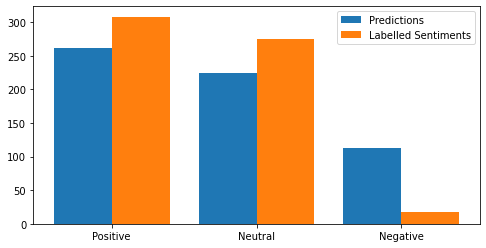

In [82]:
pred_counts = pd.Series(pred).value_counts()
labels_counts = pd.Series(Y_test_bg_nb).value_counts()
plt.figure(figsize = (8,4))
plt.bar(x_axis -0.2, pred_counts, width=0.4, label = 'Predictions')
plt.bar(x_axis +0.2, labels_counts, width=0.4, label = 'Labelled Sentiments')
plt.xticks(x_axis,["Positive", "Neutral", "Negative"])
plt.legend()

***Using Naive Bayes, The graph above shows predictions and hand labelled sentiments in positive,neutral and negative using Bi-Gram. The positive and neutral are slightly similar to the hand labelled sentintiments and in the negetive, predictions is higher than the hand labelled sentintiments.***

### Using <span style='background:magenta'> TF-IDF </span>

In [83]:
nb_clf3 = MultinomialNB()

In [84]:
X_train_tfidf_nb,X_test_tfidf_nb,Y_train_tfidf_nb, Y_test_tfidf_nb = train_test_split(tfidf_array, labels, test_size=0.25, random_state=10)

In [85]:
#Fit the classifier
nb_clf3.fit(X_train_tfidf_nb,Y_train_tfidf_nb)
pred = nb_clf3.predict(X_test_tfidf_nb)

In [86]:
print("Accuracy Score:\n", accuracy_score(labels[1800:], pred))
print("\nConfusion Matrix:\n", confusion_matrix(labels[1800:], pred))

Accuracy Score:
 0.4216666666666667

Confusion Matrix:
 [[  0   9  18]
 [  0  87 255]
 [  0  65 166]]


### Visualization & Comparison

From the above predictions, we notice that no negative sentiments are detected so we add the count of negatives to 0 as below

In [87]:
pred_counts = pd.Series(pred).value_counts()
pred_counts[-1] = 0
pred_counts

 1    439
 0    161
-1      0
dtype: int64

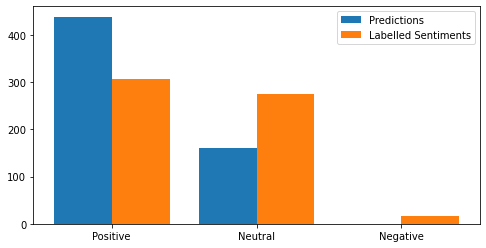

In [88]:
labels_counts = pd.Series(Y_test_tfidf_nb).value_counts()
plt.figure(figsize = (8,4))
plt.bar(x_axis -0.2, pred_counts, width=0.4, label = 'Predictions')
plt.bar(x_axis +0.2, labels_counts, width=0.4, label = 'Labelled Sentiments')
plt.xticks(x_axis,["Positive", "Neutral", "Negative"])
plt.legend()

***Using Naive Bayes, The graph above shows predictions and hand labelled sentiments in positive,neutral and negative using TF-IDF. In positive the predicted is higher than the hand-labelled sentiments. while in neutral, the hand labelled prediction are higher than the predicted and lastly the only the handlabelled sentiment has a few predictions.***

## Topic Modeling

In [89]:
cleaned_tweets = cleaned_tweets_df["Tweet"].values.tolist()

In [90]:
def gen_words(tweets):
    final = []
    for tweet in tweets:
        for word in tweet:
            new = gensim.utils.simple_preprocess(word, deacc= True)
            final.append(new)
    return (final)

data_words = gen_words(cleaned_tweets)
print(data_words)

[['conservation'], ['memory'], ['knowledge'], ['challenge'], ['sustainability'], ['sara'], ['abram'], ['secretary'], ['general'], ['centro'], ['di'], ['conservazione'], [], ['restauro'], ['la'], ['restauro'], ['venaria'], ['reale'], ['expo'], [], ['italyexpo'], ['discover'], ['luxembourg'], ['wine'], ['expo'], [], ['dubai'], ['th'], ['march'], ['book'], ['spot'], ['wine'], ['tasting'], ['animated'], ['sommelier'], ['antoine'], ['char'], ['amp'], ['chef'], ['kim'], ['kevin'], ['de'], ['dood'], ['luexpo', 'dubai'], ['expo', 'dubai'], ['expo'], [], ['luxembourg'], [], ['day'], ['left'], ['pack'], ['experience'], ['missed'], ['expo'], ['expo', 'dubai'], ['significant'], ['participation'], ['dubaipolice'], ['walk'], ['event'], ['national'], ['sport'], ['day'], ['expo'], ['uaeunitesus'], ['forget'], ['share'], ['photo'], ['video'], ['instagram'], ['expomoments'], ['tag'], ['enter'], ['remember'], ['make'], ['sure'], ['account'], ['private'], ['competition'], ['end'], [], ['march'], [], ['ter

In [91]:
id2word = corpora.Dictionary(data_words)

corpus = []

for word in data_words:
    new = id2word.doc2bow(word)
    corpus.append(new)

print(corpus)

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [], [(12, 1)], [(13, 1)], [(12, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(16, 1)], [], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(20, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [(21, 1), (37, 1)], [(16, 1), (21, 1)], [(16, 1)], [], [(19, 1)], [], [(38, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(16, 1)], [(16, 1), (21, 1)], [(43, 1)], [(44, 1)], [(45, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(38, 1)], [(16, 1)], [(50, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(55, 1)], [(56, 1)], [(57, 1)], [(58, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(63, 1)], [(64, 1)], [(65, 1)], [], [(23, 1)], [], [(66, 1)], [(31, 1)], [(67, 1)], [(68, 1)], [(16, 1)], [(21, 1)], [(69, 1)], [(70, 1)], [(71, 1)], [(72, 1)

In [92]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, 
                                            id2word = id2word,
                                            num_topics =30,
                                            random_state = 100,
                                            update_every =1,
                                            chunksize= 100,
                                            passes = 10,
                                            alpha= "auto",
                                           per_word_topics=True)

In [93]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds = "mmds", R=30)
vis

C:\Users\MR\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.439232 -0.298696       1        1  62.825052
25     0.164499 -0.445013       2        1  30.507367
21     0.009812  0.026561       3        1   0.239985
0      0.009812  0.026561       4        1   0.238059
16     0.009812  0.026561       5        1   0.238059
28     0.009812  0.026561       6        1   0.238059
27     0.009812  0.026561       7        1   0.238059
26     0.009812  0.026561       8        1   0.238059
24     0.009812  0.026561       9        1   0.238059
23     0.009812  0.026561      10        1   0.238059
22     0.009812  0.026561      11        1   0.238059
20     0.009812  0.026561      12        1   0.238059
19     0.009812  0.026561      13        1   0.238059
18     0.009812  0.026561      14        1   0.238059
17     0.009812  0.026561      15        1   0.238059
15     0.009812  0.026561      16        1   0.238059
1      0.009812  0.026561      17        1   0.238059
14     0.009812  0.026561      18        1   0.238059
13     0.009812  0.026561      19        1   0.238059
12     0.009812  0.026561      20        1   0.238059
11     0.009812  0.026561      21        1   0.238059
10     0.009812  0.026561      22        1   0.238059
9      0.009812  0.026561      23        1   0.238059
8      0.009812  0.026561      24        1   0.238059
7      0.009812  0.026561      25        1   0.238059
6      0.009812  0.026561      26        1   0.238059
4      0.009812  0.026561      27        1   0.238059
3      0.009812  0.026561      28        1   0.238059
2      0.009812  0.026561      29        1   0.238059
29     0.009812  0.026561      30        1   0.238059, topic_info=         Term          Freq         Total Category  logprob  loglift
21      dubai   9508.000000   9508.000000  Default  30.0000  30.0000
16       expo  20665.000000  20665.000000  Default  29.0000  29.0000
78        uae      0.000000      0.000000  Default  28.0000  28.0000
123  pavilion      0.000000      0.000000  Default  27.0000  27.0000
184     today      0.000000      0.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
18   discover      0.012221      0.785106  Topic30  -8.8449   1.8777
21      dubai      0.012221   9508.921511  Topic30  -8.8449  -7.5242
22         th      0.012221      0.785106  Topic30  -8.8449   1.8777
23      march      0.012221      0.785106  Topic30  -8.8449   1.8777
24       book      0.012221      0.785106  Topic30  -8.8449   1.8777

[1164 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
21        2  0.999903  dubai
16        1  0.999962   expo, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 26, 22, 1, 17, 29, 28, 27, 25, 24, 23, 21, 20, 19, 18, 16, 2, 15, 14, 13, 12, 11, 10, 9, 8, 7, 5, 4, 3, 30])

**We are using here LDA visualization for topics extraction from a corpus of tweets, this allows us to compare topics on two reduced dimensions and observe the distribution of words in topics. The visualization shows that the main topics people talk about are “Expo” and “Dubai”**

## Word Cloud

In [94]:
#pip install wordcloud

In [95]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

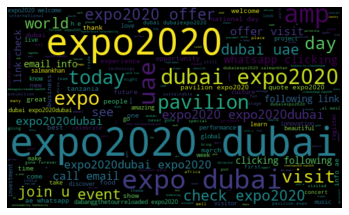

In [96]:
allWords = ' '.join([twts for twts in processed_tweets])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

**In word clouds, the bigger is the word, the more popular the word in the tweets. So as the word cloud depicts, expo2020 & dubai are the two most common words that people mention in their tweets. This result matches with the LDA visulaization**